In [1]:
###############################
# Standard Imports
###############################
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
from time import sleep

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})  # To remove the annoying "Two many plots open" warning
plt.style.use('ggplot')                              # Make it look nice
%config InlineBackend.figure_format='retina'         # For high resolution screens
sns.set_context("talk")

###############################
# Import the DGI Python Toolkit
###############################


In [2]:

#base_channel = './topforsets_inlcrl_all.dat'
#top_channel = './truncation_inlcrl_all.dat'

base_channel = './topforsets_inlcrl_all.dat'
top_channel = './truncation_inlcrl_all.dat'

In [3]:
import csv

with open(top_channel) as tsv:
    reader = csv.reader(tsv, delimiter="\t")
    temp_array = np.array(list(reader))
    array_top = temp_array.astype(np.float)

with open(base_channel) as tsv:
    reader = csv.reader(tsv, delimiter="\t")
    temp_array = np.array(list(reader))
    array_base = temp_array.astype(np.float)


In [4]:
print(array_top.shape)
print(array_base.shape)

(592150, 3)
(456943, 3)


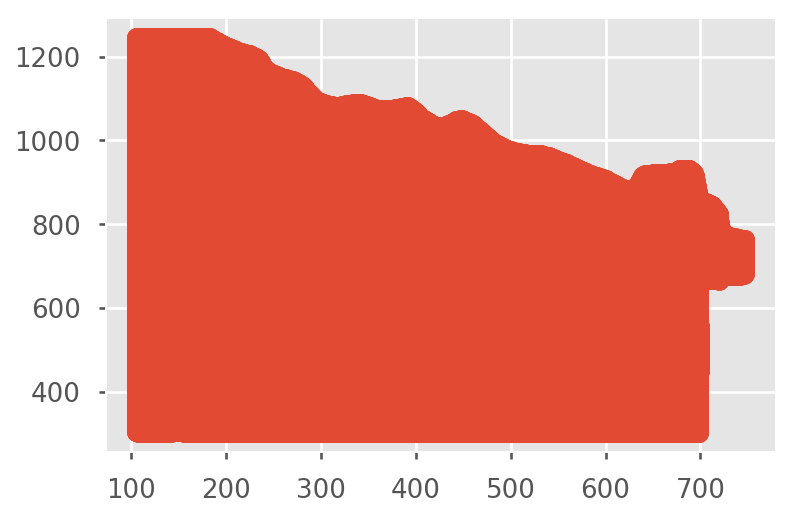

In [5]:
import matplotlib.pyplot as plt
#plt.scatter(array_top[:,0], array_top[:,1]);
plt.scatter(array_base[:,0], array_base[:,1]);

plt.show()

In [6]:
#[float(i) for i in d
type(array_top[0][0])
array_top[0][1]
len(array_top)

print(np.amin(array_top[:,0]))
print(np.amax(array_top[:,0]))
print(np.amin(array_top[:,1]))
print(np.amax(array_top[:,1]))

print(np.amin(array_base[:,0]))
print(np.amax(array_base[:,0]))
print(np.amin(array_base[:,1]))
print(np.amax(array_base[:,1]))


104.0
748.0
302.0
1248.0
106.0
747.0
303.0
1246.0


In [7]:
i_top = array_top[:,0] - np.amin(array_top[:,0])
i_top = i_top.astype(np.int)
print(i_top)

j_top = array_top[:,1] - np.amin(array_top[:,1])
j_top = j_top.astype(np.int)
print(j_top) 

i_base = array_base[:,0] - np.amin(array_top[:,0])
i_base = i_base.astype(np.int)
print(i_base)

j_base = array_base[:,1] - np.amin(array_top[:,1])
j_base = j_base.astype(np.int)
print(j_base) 


[  0   0   0 ... 644 644 644]
[  0   1   2 ... 944 945 946]
[  2   2   2 ... 643 643 643]
[  2   3   4 ... 460 461 462]


In [8]:
s_top = np.zeros([645,947])
s_base = np.zeros([645,947])

s_top[s_top==0] = np.nan
s_base[s_base==0] = np.nan

In [9]:
s_top[0,0]
print(s_base[i_base,j_base].shape)
print(array_base[:,2].shape)

(456943,)
(456943,)


In [10]:
s_top[i_top,j_top] = array_top[:,2]
s_base[i_base,j_base] = array_base[:,2]

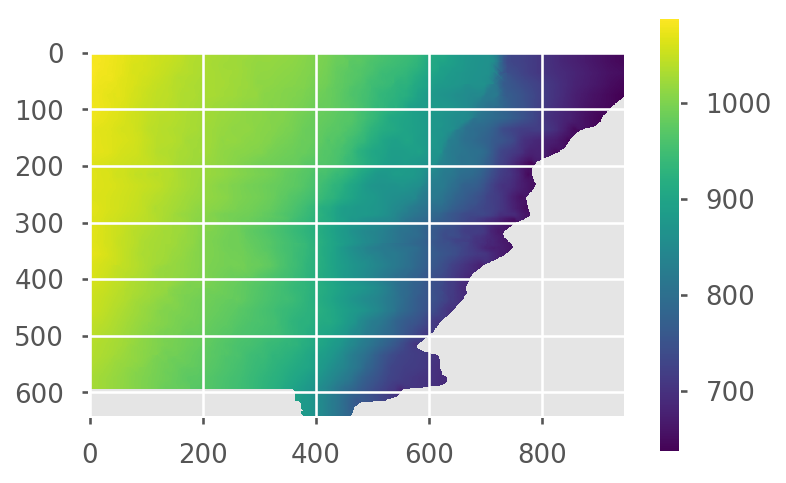

In [11]:
plt.imshow(s_base, cmap='viridis');
plt.colorbar();

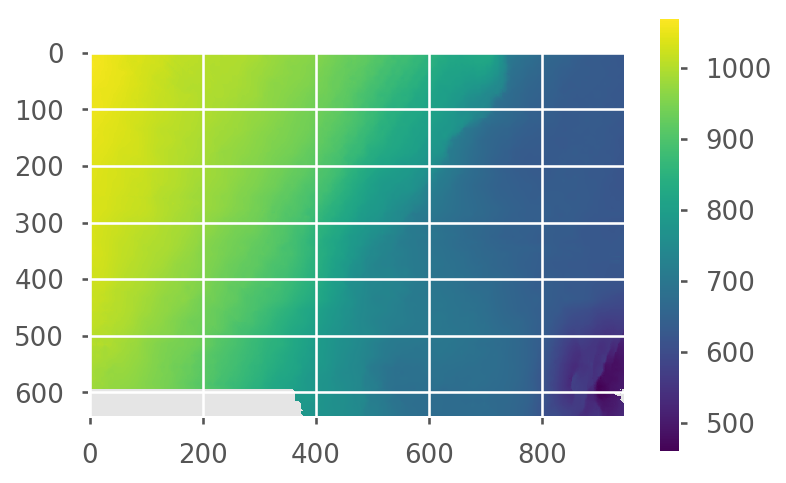

In [12]:
plt.imshow(s_top, cmap='viridis')
plt.colorbar()

In [13]:
p = 462

In [14]:
s1 = s_top[:,:]
s2 = s_base[:,:]

In [15]:
m = int(s1.shape[0])
n = int(s1.shape[1])
print(m, n)

645 947


In [16]:
s1.shape

(645, 947)

In [17]:
dt = 0.004 * 1000
def idxs_surf(s1):
    idxs = (s1/dt)
    idxs[idxs<0]=np.nan
    idxs = idxs.astype(np.int)
    return idxs

a = idxs_surf(s1)
b = idxs_surf(s2)

#plt.plot(idxs)
#plt.show()

C:\Users\nates\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [18]:
a.shape

(645, 947)

In [19]:
c = np.zeros([m,n,p])

In [20]:
xx1 = np.expand_dims(a,2)
yy1 = np.tile(xx1,p)
yy1.shape

(645, 947, 462)

In [21]:
xx2 = np.expand_dims(b,2)
yy2 = np.tile(xx2,p)
yy2.shape

(645, 947, 462)

In [22]:
t = np.arange(p)

c = np.tile(t,m)
cc = np.tile(c,n).reshape(m,n,p)
cc.shape
#print(cc)


(645, 947, 462)

In [23]:
yy1.shape

(645, 947, 462)

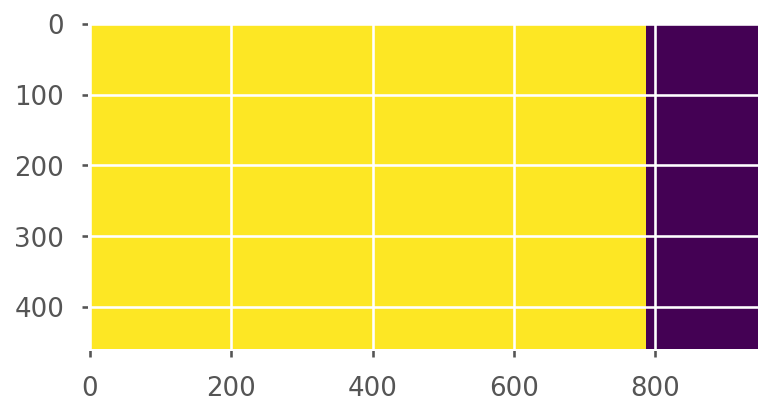

In [24]:
plt.imshow(yy2[200].T, cmap='viridis')

In [25]:
d = np.where((cc>yy1) & (cc<yy2),1,0)
d

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

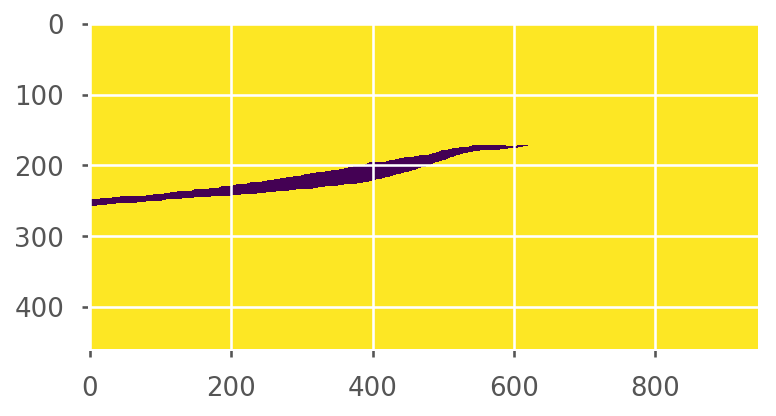

In [29]:
plt.imshow(d[550].T, clim=(0,1), cmap='viridis')
plt.show()

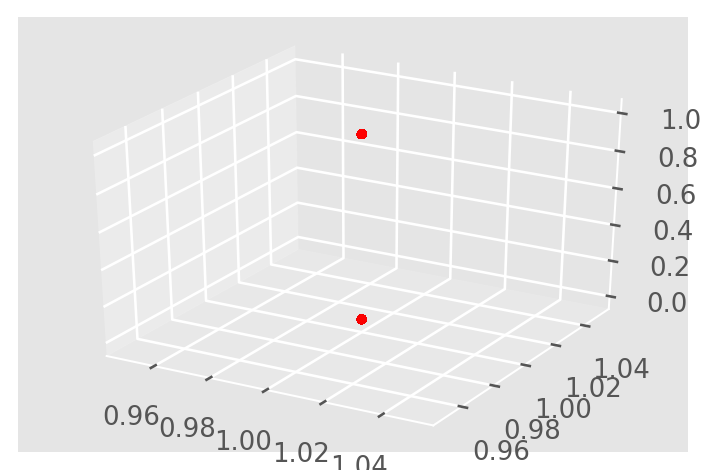

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[0], d[1], d[2], zdir='z', c= 'red')
plt.show()